In [14]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
df = pd.read_csv("weatherHistory.csv")

df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [16]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [17]:
#feature selection buat predict humidity
    ## Formatted date, summary, ersip typ, loud cover, daily summary -> buang yg gaperlu

df = df.drop(columns=["Formatted Date", "Summary", "Precip Type", "Loud Cover", "Daily Summary"])

df.head()



,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [18]:
#model selection

# 80 : 10 : 10
x = df.drop(columns=["Humidity"])
y = df["Humidity"]

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
# data standarization
scaler = StandardScaler() #biar nilai val ga terlalu beda asecara range

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)




In [20]:
model = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Dense(32, activation="relu", input_dim = x_train.shape[1]),

    #hidden layer
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),


    #output layer
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(optimizer = "adam", loss = "mae", metrics=["mae"])


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# model training
history = model.fit(
    x_train,
    y_train,
    epochs = 100,
    batch_size = 256,
    validation_data = [x_val, y_val]


)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1626 - mae: 0.1626 - val_loss: 0.0972 - val_mae: 0.0972
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0939 - mae: 0.0939 - val_loss: 0.0911 - val_mae: 0.0911
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0900 - mae: 0.0900 - val_loss: 0.0883 - val_mae: 0.0883
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0880 - mae: 0.0880 - val_loss: 0.0869 - val_mae: 0.0869
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0865 - mae: 0.0865 - val_loss: 0.0859 - val_mae: 0.0859
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0854 - mae: 0.0854 - val_loss: 0.0845 - val_mae: 0.0845
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0844 - mae: 0.0844 - val_loss: 0.0850 - val_mae: 0.0850
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0837 - mae: 0.0837 - val_loss: 0.0832 - val_mae: 0.0832
Epoch 9/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [23]:
#model
loss, mae = model.evaluate(x_test, y_test)
print(f"test loss:  {loss:.4f}")
print(f"test mae:  {mae:.4f}")

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0809 - mae: 0.0809
test loss:  0.0809
test mae:  0.0809


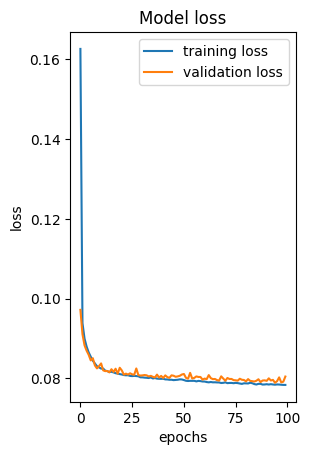

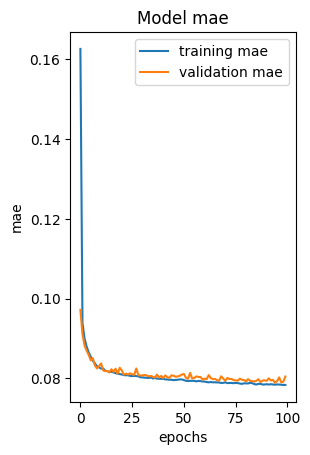

In [26]:
#plotting

plt.Figure(figsize = (16, 9))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()


plt.subplot(1, 2, 1)
plt.plot(history.history["mae"], label = "training mae")
plt.plot(history.history["val_mae"], label = "validation mae")
plt.title("Model mae")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.legend()

plt.show()


In [28]:
#model prediction
prediction = model.predict(x_test[:20]).flatten()
actual = y_test[:20]

print("Prediction vs actual")
for idx, label in enumerate(zip(prediction, actual)):
    print(f"{idx}, Predicted: {label[0]:.4f} | Actual: {label[1]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction vs actual
0, Predicted: 0.5835 | Actual: 0.5600
1, Predicted: 0.9161 | Actual: 0.9200
2, Predicted: 0.5355 | Actual: 0.4900
3, Predicted: 0.7750 | Actual: 0.8700
4, Predicted: 0.8560 | Actual: 0.8900
5, Predicted: 0.8383 | Actual: 0.7800
6, Predicted: 0.5228 | Actual: 0.6900
7, Predicted: 0.3082 | Actual: 0.3200
8, Predicted: 0.7483 | Actual: 0.5600
9, Predicted: 0.3967 | Actual: 0.3400
10, Predicted: 0.7593 | Actual: 0.8700
11, Predicted: 0.8980 | Actual: 0.9200
12, Predicted: 0.8819 | Actual: 0.8800
13, Predicted: 0.8640 | Actual: 0.9200
14, Predicted: 0.9016 | Actual: 0.9900
15, Predicted: 0.8186 | Actual: 0.7000
16, Predicted: 0.6739 | Actual: 0.7100
17, Predicted: 0.7870 | Actual: 0.7600
18, Predicted: 0.8609 | Actual: 0.9600
19, Predicted: 0.8813 | Actual: 0.8900


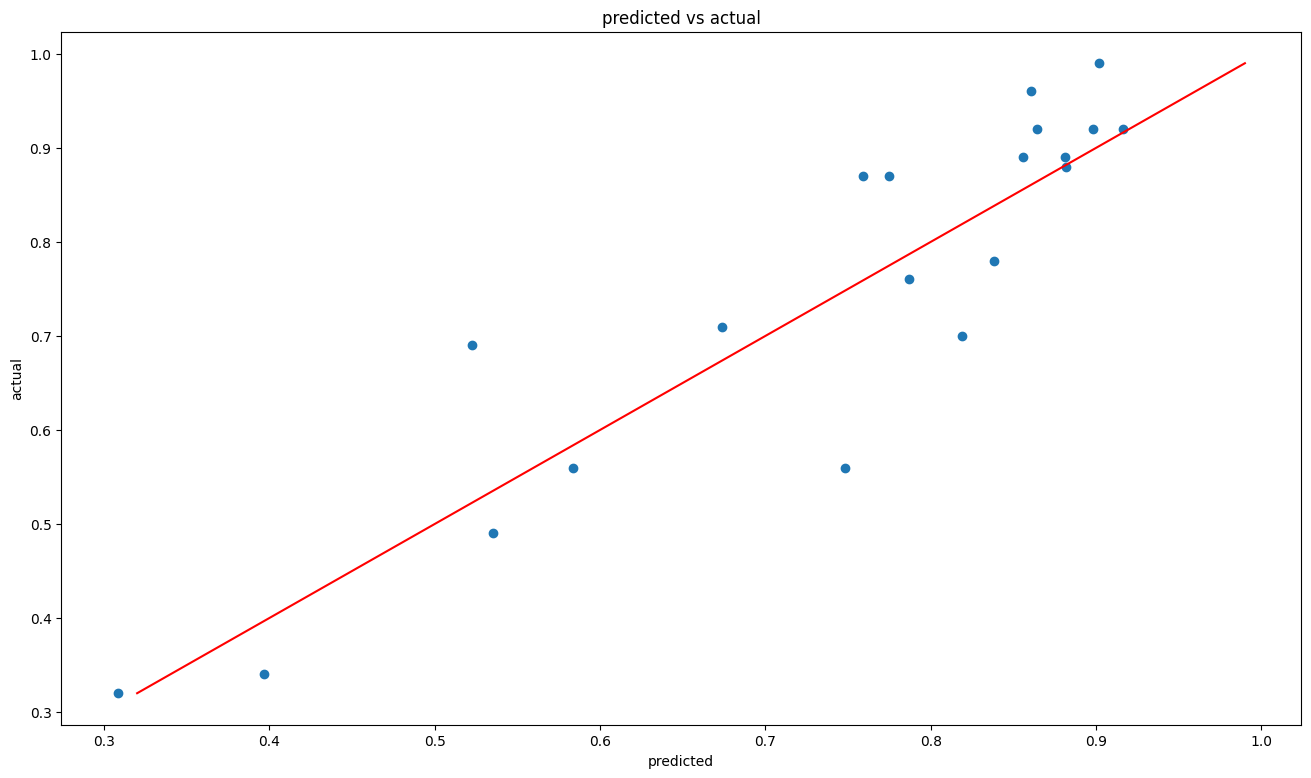

In [30]:
#plotting

plt.figure(figsize=(16, 9))
plt.scatter(prediction, actual)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color="red" )
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("predicted vs actual")

plt.show()